In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

#### Load the dataset and conduct basic data exploration (summary statistics, missing values, data types).

In [2]:
df=pd.read_csv('adult_with_headers.csv')

In [75]:
df.head(50)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,7,77516,Bachelors,13,Never-married,1,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,6,83311,Bachelors,13,Married-civ-spouse,4,Husband,White,Male,0,0,13,United-States,<=50K
2,38,4,215646,HS-grad,9,Divorced,6,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,4,234721,11th,7,Married-civ-spouse,6,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,4,338409,Bachelors,13,Married-civ-spouse,10,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,4,284582,Masters,14,Married-civ-spouse,4,Wife,White,Female,0,0,40,United-States,<=50K
6,49,4,160187,9th,5,Married-spouse-absent,8,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,6,209642,HS-grad,9,Married-civ-spouse,4,Husband,White,Male,0,0,45,United-States,>50K
8,31,4,45781,Masters,14,Never-married,10,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,4,159449,Bachelors,13,Married-civ-spouse,4,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.shape

(32561, 15)

In [7]:
df.duplicated().any()

True

In [8]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

#### Apply normalization and standardization for numerical features

In [21]:
num_col=[i for i in df.columns if df[i].dtype!='O']
print(num_col)

['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [22]:
cat_col=[i for i in df.columns if df[i].dtype=='O']
print(cat_col)

['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


#### •	Apply scaling techniques to numerical features:
•	Standard Scaling
•	Min-Max Scaling


In [44]:
std_sca=StandardScaler()
df_scaled=std_sca.fit_transform(df[num_col])
df_scaled

array([[ 0.03067056, -1.06361075,  1.13473876,  0.1484529 , -0.21665953,
        -0.03542945],
       [ 0.83710898, -1.008707  ,  1.13473876, -0.14592048, -0.21665953,
        -2.22215312],
       [-0.04264203,  0.2450785 , -0.42005962, -0.14592048, -0.21665953,
        -0.03542945],
       ...,
       [ 1.42360965, -0.35877741, -0.42005962, -0.14592048, -0.21665953,
        -0.03542945],
       [-1.21564337,  0.11095988, -0.42005962, -0.14592048, -0.21665953,
        -1.65522476],
       [ 0.98373415,  0.92989258, -0.42005962,  1.88842434, -0.21665953,
        -0.03542945]])

In [45]:
df1=pd.DataFrame(df_scaled,columns=num_col)
df1

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429
...,...,...,...,...,...,...
32556,-0.849080,0.639741,0.746039,-0.145920,-0.21666,-0.197409
32557,0.103983,-0.335433,-0.420060,-0.145920,-0.21666,-0.035429
32558,1.423610,-0.358777,-0.420060,-0.145920,-0.21666,-0.035429
32559,-1.215643,0.110960,-0.420060,-0.145920,-0.21666,-1.655225


In [33]:
min_max=MinMaxScaler()
df_minmax=min_max.fit_transform(df[num_col])
df_minmax

array([[0.30136986, 0.0443019 , 0.8       , 0.02174022, 0.        ,
        0.39795918],
       [0.45205479, 0.0482376 , 0.8       , 0.        , 0.        ,
        0.12244898],
       [0.28767123, 0.13811345, 0.53333333, 0.        , 0.        ,
        0.39795918],
       ...,
       [0.56164384, 0.09482688, 0.53333333, 0.        , 0.        ,
        0.39795918],
       [0.06849315, 0.12849934, 0.53333333, 0.        , 0.        ,
        0.19387755],
       [0.47945205, 0.18720338, 0.53333333, 0.1502415 , 0.        ,
        0.39795918]])

In [48]:
df2=pd.DataFrame(df_minmax,columns=num_col)
df2

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959
...,...,...,...,...,...,...
32556,0.136986,0.166404,0.733333,0.000000,0.0,0.377551
32557,0.315068,0.096500,0.533333,0.000000,0.0,0.397959
32558,0.561644,0.094827,0.533333,0.000000,0.0,0.397959
32559,0.068493,0.128499,0.533333,0.000000,0.0,0.193878


#### Encoding

In [70]:
label=LabelEncoder()
df['workclass']=label.fit_transform(df['workclass'])
print(df['workclass'])

0        7
1        6
2        4
3        4
4        4
        ..
32556    4
32557    4
32558    4
32559    4
32560    5
Name: workclass, Length: 32561, dtype: int32


In [71]:
df['occupation']=label.fit_transform(df['occupation'])
print(df['occupation'])

0         1
1         4
2         6
3         6
4        10
         ..
32556    13
32557     7
32558     1
32559     1
32560     4
Name: occupation, Length: 32561, dtype: int32


In [84]:
cat1=df['education'].unique()
cat1

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [87]:
df['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [88]:
df['marital_status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [89]:
df['native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [90]:
#one_hot=make_pipeline(OneHotEncoder())
#ord_enc=make_pipeline(OrdinalEncoder(categories=[[' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',' Some-college', 
                                                 # 'Assoc-acdm', ' Assoc-voc', ' 7th-8th',' Doctorate', ' Prof-school', ' 5th-6th', 
                                                  #' 10th', ' 1st-4th',' Preschool', ' 12th'],[' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
                                                  #' Other-relative'],[' Never-married', ' Married-civ-spouse', ' Divorced',
                                                  #' Married-spouse-absent', ' Separated', ' Married-AF-spouse',' Widowed'],
                                                 #[' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
                                                  #' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
                                                  #' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
                                                 # ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
                                                  #' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
                                                  #' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
                                                  #' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
                                                 # ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
                                                  #' Ireland', ' Hungary', ' Holand-Netherlands']]))

In [99]:
#transformers=ColumnTransformer([('one_hot',one_hot,['sex']),('ord_enc',ord_enc,[['education','relationship','marital_status','native_country']])])

In [103]:
#df_new=pd.DataFrame(transformers.fit_transform(df),columns=transformers.get_feature_names_out())

In [111]:
ord_enc=OrdinalEncoder()
df_ordenc=(ord_enc.fit_transform(df[cat_col]))
df5=pd.DataFrame(ord_enc.fit_transform(df[cat_col]),columns=cat_col)
df5.head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,7.0,9.0,4.0,1.0,1.0,4.0,1.0,39.0,0.0
1,6.0,9.0,2.0,4.0,0.0,4.0,1.0,39.0,0.0
2,4.0,11.0,0.0,6.0,1.0,4.0,1.0,39.0,0.0
3,4.0,1.0,2.0,6.0,0.0,2.0,1.0,39.0,0.0
4,4.0,9.0,2.0,10.0,5.0,2.0,0.0,5.0,0.0


In [112]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,7,77516,Bachelors,13,Never-married,1,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,6,83311,Bachelors,13,Married-civ-spouse,4,Husband,White,Male,0,0,13,United-States,<=50K
2,38,4,215646,HS-grad,9,Divorced,6,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,4,234721,11th,7,Married-civ-spouse,6,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,4,338409,Bachelors,13,Married-civ-spouse,10,Wife,Black,Female,0,0,40,Cuba,<=50K


In [116]:
df_new=pd.concat([df2,df5],axis=1)
df_new.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,0.301370,0.044302,0.800000,0.02174,0.0,0.397959,7.0,9.0,4.0,1.0,1.0,4.0,1.0,39.0,0.0
1,0.452055,0.048238,0.800000,0.00000,0.0,0.122449,6.0,9.0,2.0,4.0,0.0,4.0,1.0,39.0,0.0
2,0.287671,0.138113,0.533333,0.00000,0.0,0.397959,4.0,11.0,0.0,6.0,1.0,4.0,1.0,39.0,0.0
3,0.493151,0.151068,0.400000,0.00000,0.0,0.397959,4.0,1.0,2.0,6.0,0.0,2.0,1.0,39.0,0.0
4,0.150685,0.221488,0.800000,0.00000,0.0,0.397959,4.0,9.0,2.0,10.0,5.0,2.0,0.0,5.0,0.0


In [117]:
df.shape

(32561, 15)

#### Feature Engineering
* Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.
* Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.

In [128]:
def outlier_capping(df,column):
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR= Q3-Q1
    lower_bound= Q1-1.5*IQR
    upper_bound= Q3+1.5*IQR
    df[column]= df[column].apply(lambda x: lower_bound if x<lower_bound else upper_bound if x>upper_bound else x)
for col in df.select_dtypes(include=['float','int']).columns:
    outlier_capping(df_new,col)

In [129]:
df_new.shape

(32561, 15)

<Axes: xlabel='capital_gain', ylabel='capital_loss'>

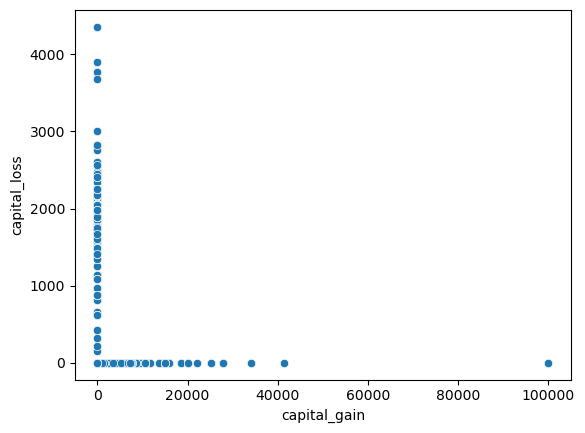

In [132]:
sns.scatterplot(df,x='capital_gain',y='capital_loss')

<Axes: xlabel='capital_gain', ylabel='capital_loss'>

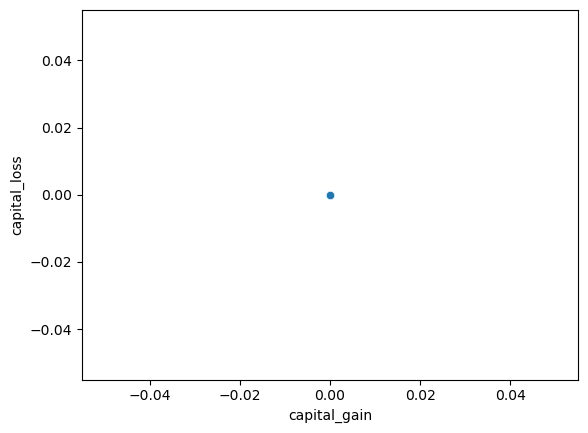

In [134]:
sns.scatterplot(df_new,x='capital_gain',y='capital_loss')

<Axes: xlabel='education', ylabel='education_num'>

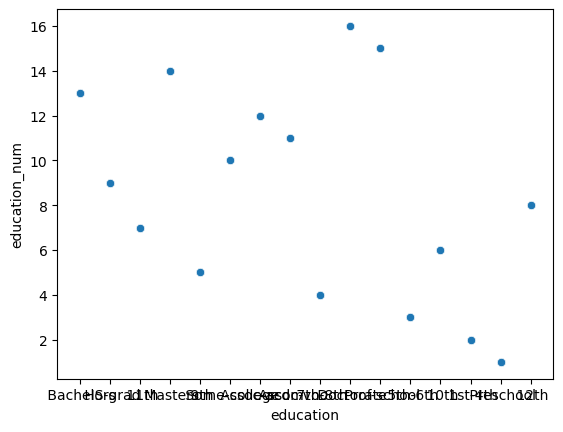

In [135]:
sns.scatterplot(df,x='education',y='education_num')

<Axes: xlabel='education', ylabel='education_num'>

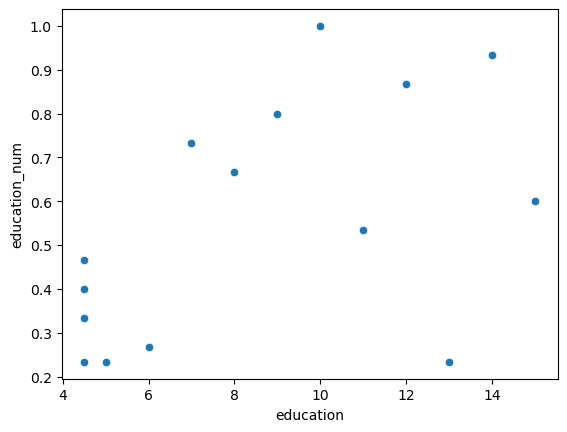

In [136]:
sns.scatterplot(df_new,x='education',y='education_num')

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>,
        <Axes: title={'center': 'education_num'}>],
       [<Axes: title={'center': 'capital_gain'}>,
        <Axes: title={'center': 'capital_loss'}>,
        <Axes: title={'center': 'hours_per_week'}>],
       [<Axes: title={'center': 'workclass'}>,
        <Axes: title={'center': 'education'}>,
        <Axes: title={'center': 'marital_status'}>],
       [<Axes: title={'center': 'occupation'}>,
        <Axes: title={'center': 'relationship'}>, <Axes: >]], dtype=object)

<Figure size 1500x1500 with 0 Axes>

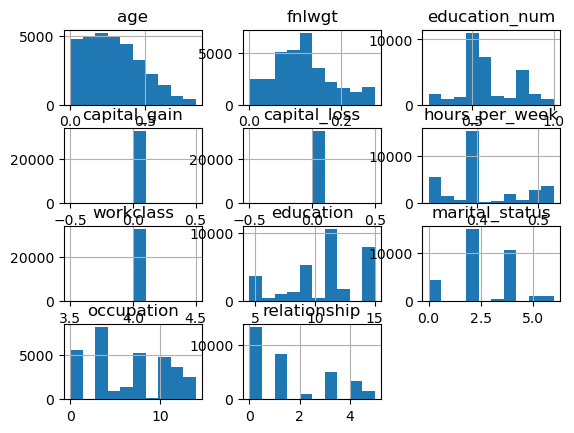

In [155]:
plt.figure(figsize = (15,15))
df_new.iloc[:,:11].hist()

In [152]:
df['Total_Income'] = df['capital_gain'] - df['capital_loss']
df['Total_Income']

0         2174
1            0
2            0
3            0
4            0
         ...  
32556        0
32557        0
32558        0
32559        0
32560    15024
Name: Total_Income, Length: 32561, dtype: int64

In [153]:
df['Total_Income'].value_counts()

 0        28330
 15024      347
 7688       284
 7298       246
-1902       202
          ...  
-1844         1
 1111         1
 2538         1
-2489         1
-1411         1
Name: Total_Income, Length: 210, dtype: int64

In [154]:
def categorize_education(education_num):
    if education_num <= 5:
        return 'elimentary School'
    elif education_num <= 10:
        return 'High School'
    elif education_num <= 12:
        return 'intermediate'
    elif education_num <= 16:
        return 'Bachelor Degree'
    else:
        return 'Graduate Degree'

# Apply categorization
df_new['Education_Level'] = df_new['education_num'].apply(categorize_education)


In [157]:
skewed_features = df[num_col].apply(lambda x: x.skew()).sort_values(ascending=False)

In [158]:
skewed_features

capital_gain      11.953848
capital_loss       4.594629
fnlwgt             1.446980
age                0.558743
hours_per_week     0.227643
education_num     -0.311676
dtype: float64

In [159]:
skewness = pd.DataFrame({'Skewness': skewed_features})

In [160]:
skewness

,Skewness
capital_gain,11.953848
capital_loss,4.594629
fnlwgt,1.446980
age,0.558743
hours_per_week,0.227643
education_num,-0.311676


In [161]:
df['capital_gain'] = np.log1p(df['capital_gain'])

In [162]:
df['capital_gain'] 

0        7.684784
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
32556    0.000000
32557    0.000000
32558    0.000000
32559    0.000000
32560    9.617471
Name: capital_gain, Length: 32561, dtype: float64

#### Feature Selection

In [138]:
from sklearn.ensemble import IsolationForest

In [140]:
#X = df_new.drop('Education_Level', axis = 1)
X=df_new.iloc[:,:-5]
# Initialize the Isolation Forest
iso_forest=IsolationForest(contamination=0.2)  # 'contamination' is the expected proportion of outliers

# Fit the model
iso_forest.fit(X)

IsolationForest(contamination=0.2)

In [141]:
#predicting anomolies
y_pred=iso_forest.predict(X)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [142]:
#removing anomolies
x_no_outliers=X[y_pred==1]
x_no_outliers

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass,education,marital_status,occupation
0,0.301370,0.044302,0.800000,0.0,0.0,0.397959,4.0,9.0,4.0,1.0
1,0.452055,0.048238,0.800000,0.0,0.0,0.321429,4.0,9.0,2.0,4.0
2,0.287671,0.138113,0.533333,0.0,0.0,0.397959,4.0,11.0,0.0,6.0
3,0.493151,0.151068,0.400000,0.0,0.0,0.397959,4.0,4.5,2.0,6.0
4,0.150685,0.221488,0.800000,0.0,0.0,0.397959,4.0,9.0,2.0,10.0
...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,0.166404,0.733333,0.0,0.0,0.377551,4.0,7.0,2.0,13.0
32557,0.315068,0.096500,0.533333,0.0,0.0,0.397959,4.0,11.0,2.0,7.0
32558,0.561644,0.094827,0.533333,0.0,0.0,0.397959,4.0,11.0,6.0,1.0
32559,0.068493,0.128499,0.533333,0.0,0.0,0.321429,4.0,11.0,4.0,1.0


In [143]:
#removing anomolies
x_no_outliers=X[y_pred==1]
x_no_outliers

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass,education,marital_status,occupation
0,0.301370,0.044302,0.800000,0.0,0.0,0.397959,4.0,9.0,4.0,1.0
1,0.452055,0.048238,0.800000,0.0,0.0,0.321429,4.0,9.0,2.0,4.0
2,0.287671,0.138113,0.533333,0.0,0.0,0.397959,4.0,11.0,0.0,6.0
3,0.493151,0.151068,0.400000,0.0,0.0,0.397959,4.0,4.5,2.0,6.0
4,0.150685,0.221488,0.800000,0.0,0.0,0.397959,4.0,9.0,2.0,10.0
...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,0.166404,0.733333,0.0,0.0,0.377551,4.0,7.0,2.0,13.0
32557,0.315068,0.096500,0.533333,0.0,0.0,0.397959,4.0,11.0,2.0,7.0
32558,0.561644,0.094827,0.533333,0.0,0.0,0.397959,4.0,11.0,6.0,1.0
32559,0.068493,0.128499,0.533333,0.0,0.0,0.321429,4.0,11.0,4.0,1.0


#### PPS

In [144]:
import ppscore as pps

In [151]:
pps_matrix=pps.matrix(x_no_outliers)
pps_matrix

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,age,age,1.0,predict_itself,True,None,0.000000,1.000000,None
1,age,fnlwgt,0.0,regression,True,mean absolute error,0.045364,0.045676,DecisionTreeRegressor()
2,age,education_num,0.0,regression,True,mean absolute error,0.100860,0.108335,DecisionTreeRegressor()
3,age,capital_gain,0.0,target_is_constant,True,None,1.000000,1.000000,None
4,age,capital_loss,0.0,target_is_constant,True,None,1.000000,1.000000,None
...,...,...,...,...,...,...,...,...,...
95,occupation,hours_per_week,0.0,regression,True,mean absolute error,0.039146,0.043801,DecisionTreeRegressor()
96,occupation,workclass,0.0,target_is_constant,True,None,1.000000,1.000000,None
97,occupation,education,0.0,regression,True,mean absolute error,1.959600,2.070987,DecisionTreeRegressor()
98,occupation,marital_status,0.0,regression,True,mean absolute error,1.043200,1.106949,DecisionTreeRegressor()
